### _Import Libraries and Load the data_ 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [3]:
from google.colab import files
upload = files.upload()

Saving daily-min-temperatures.csv to daily-min-temperatures (3).csv


In [4]:
data = pd.read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0])

Note:  

_dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')_    
_df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)_  

In [5]:
data.head() #First Five rows of the data

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [6]:
data['t'] = data['Temp'].shift(1)

In [7]:
data.head()

,Date,Temp,t
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6


### _Naive(Persistence) Model_

- _The persistence represents the simplest way of producing a forecast._  
- _A persistence model assumes that the future value of a time series is calculated under the assumption that nothing changes between the current time and the forecast time._    
- _The simplest model that we could use to make predictions would be to persist the last observation._   
- _We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model._  


In [8]:
train, test = data[1:data.shape[0]-7], data[data.shape[0]-7:]

_We can develop a test harness for the problem by splitting the observations into training and test sets, with only the last 7 observations in the dataset assigned to the test set as “unseen” data that we wish to predict._

In [9]:
print(train.shape)
print(test.shape)

(3642, 3)
(7, 3)


In [10]:
train.head()

,Date,Temp,t
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


In [11]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

#### _Walk-Forward Validation_

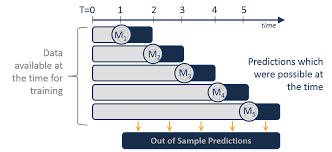

_The predictions are made using a walk-forward validation model so that we can persist the most recent observations for the next day. This means that we are not making a 7-day forecast, but 7 1-day forecasts._

In [12]:
predictions = test_X.copy()

In [13]:
print(predictions)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64


In [14]:
print(test_y)

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
print(mse)

3.4228571428571413


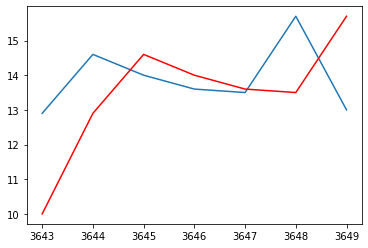

In [16]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

_The expected values for the next 7 days are plotted (blue) compared to the predictions from the model (red)._

### _Auto Regression Model_

_AutoRegression is basically a linear regression model. In Linear Regression model, the prediction of output value is based on a linear combination of input values._  

_Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.It is a very simple idea that can result in accurate forecasts on a range of time series problems._

___Equation___ : ```yhat = b0+b1*X1```  
Where yhat is the prediction, b0 and b1 are coefficients found by optimizing the model on training data, and X is an input value. 

_This technique can be used on time series where input variables are taken as observations at previous time steps, called "lag variables"._



In [17]:
train, test = data.Temp[1:data.shape[0]-7], data.Temp[data.shape[0]-7:]

_The statsmodels library provides an autoregression model where you must specify an appropriate lag value and trains a linear regression model._

In [18]:
from statsmodels.tsa.ar_model import AR

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


_We can use this model by first creating the model AR() and then calling fit() to train it on our dataset._

In [19]:
model = AR(train)

In [20]:
model_fit = model.fit()

In [21]:
model_fit.k_ar #Returns no.of lag variables

29

In [22]:
model_fit.params #Returns coef of lag variables

const       0.557544
L1.Temp     0.588595
L2.Temp    -0.090826
L3.Temp     0.048262
L4.Temp     0.040065
L5.Temp     0.039302
L6.Temp     0.025946
L7.Temp     0.044668
L8.Temp     0.012768
L9.Temp     0.037436
L10.Temp   -0.000812
L11.Temp    0.004791
L12.Temp    0.018473
L13.Temp    0.026891
L14.Temp    0.000576
L15.Temp    0.024810
L16.Temp    0.007403
L17.Temp    0.009916
L18.Temp    0.034160
L19.Temp   -0.009120
L20.Temp    0.024213
L21.Temp    0.018787
L22.Temp    0.012184
L23.Temp   -0.018553
L24.Temp   -0.001772
L25.Temp    0.016732
L26.Temp    0.019762
L27.Temp    0.009832
L28.Temp    0.006227
L29.Temp   -0.001377
dtype: float64

#### _Making Prediction_ 

- _If we have values of last 29 timeframes, we can predict the future value using coef and constant term obtained._  
- _Other way to predict is using ```.predict``` method._

_Once fit, we can use the model to make a prediction by calling the predict() function for a number of observations in the future_

_here, we have to give the start and the end of the period for which we want the prediction._

In [23]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

In [24]:
predictions

3643    11.871275
3644    13.053794
3645    13.532591
3646    13.243126
3647    13.091438
3648    13.146989
3649    13.176153
dtype: float64

In [25]:
predictions.iloc[0] #returns the first forecasted value

11.87127484772785

#### _Evaluation_

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
print(mse)

1.50152523100691


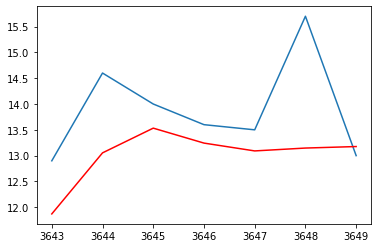

In [27]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

_The expected values for the next 7 days are plotted (blue) compared to the predictions from the model (red)._

#### _Walk Forward Validation for AR Model_

In [28]:
df = pd.read_csv('daily-min-temperatures.csv', header=0, parse_dates=[0])

In [29]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [30]:
data = train
predict = []
for t in test:
  model = AR(data)
  model_fit = model.fit()
  y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
  print(y.values[0])
  predict.append(y.values[0])
  data = np.append(data, t)
  data = pd.Series(data)

11.87127484772785
13.660699943835207
14.353164144090162
13.430120791627004
13.374756477185125
13.479111299420515
14.767773018439872


In [31]:
predict

[11.87127484772785,
 13.660699943835207,
 14.353164144090162,
 13.430120791627004,
 13.374756477185125,
 13.479111299420515,
 14.767773018439872]

In [32]:
mse = mean_squared_error(test.values, predict)
mse

1.4524568425185203

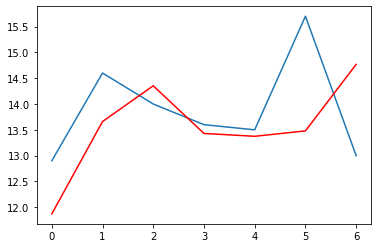

In [33]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')